In [141]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
%matplotlib inline

### Load Data

In [142]:
#Load Dataset into training and testing
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [143]:
print('Traing Shape : ',X_train.shape)
print('Testing shape : ',X_test.shape)

Traing Shape :  (60000, 28, 28)
Testing shape :  (10000, 28, 28)


In [144]:
class_names = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

### Visualization of the Data

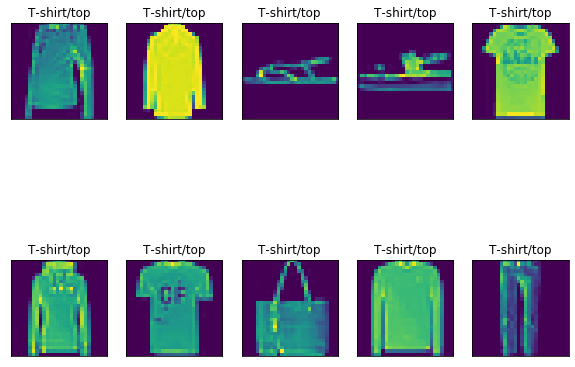

In [145]:
figure = plt.figure(figsize=(10, 8))
rand_images = np.random.choice(X_train.shape[0], size=10, replace=False)
for i, index in enumerate(rand_images):
    ax = figure.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_train[index]))
    idx = np.argmax(y_train[index])
    # Set the title for each image
    ax.set_title("{}".format(class_names[idx]))

### Preprocessing

In [146]:
# Rescaling the dataset
X_train_r = X_train/255.0
X_test_r = X_test/255.0

### Implementing Callback Class

In [147]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.9):
          print("\nReached 90% accuracy so cancelling training!")
          self.model.stop_training = True

In [148]:
callbacks = mycallback()

### Building an ANN Model

In [149]:
#Model Definition
model = tf.keras.models.Sequential()

In [150]:
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) #Flatten the input image 

In [151]:
#Adding layers
model.add(tf.keras.layers.Dense(128,'relu')) #First Layer

In [152]:
model.add(tf.keras.layers.Dropout(0.2)) #using dropouts to regularize the NN

In [153]:
model.add(tf.keras.layers.Dense(64,'relu')) #second layer

In [154]:
model.add(tf.keras.layers.Dense(10,'softmax')) #output layer

In [155]:
#compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [172]:
#Train the model
history = model.fit(X_train_r, y_train, epochs=10, callbacks=[callbacks],validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 56us/sample - loss: 0.2801 - accuracy: 0.8964 - val_loss: 0.2550 - val_accuracy: 0.9049
Epoch 2/10
48000/48000 [==============================] - 3s 60us/sample - loss: 0.2721 - accuracy: 0.8981 - val_loss: 0.2525 - val_accuracy: 0.9029
Epoch 3/10
48000/48000 [==============================] - 3s 57us/sample - loss: 0.2685 - accuracy: 0.8982 - val_loss: 0.2518 - val_accuracy: 0.9036
Epoch 4/10
47360/48000 [============================>.] - ETA: 0s - loss: 0.2636 - accuracy: 0.9005
Reached 90% accuracy so cancelling training!
48000/48000 [==============================] - 3s 56us/sample - loss: 0.2632 - accuracy: 0.9008 - val_loss: 0.2734 - val_accuracy: 0.8989


In [173]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [174]:
#Evaluate the model perfomance of test data
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 28us/sample - loss: 56.6262 - accuracy: 0.8634


[56.626179846191405, 0.8634]

### Visualization of the Prediction

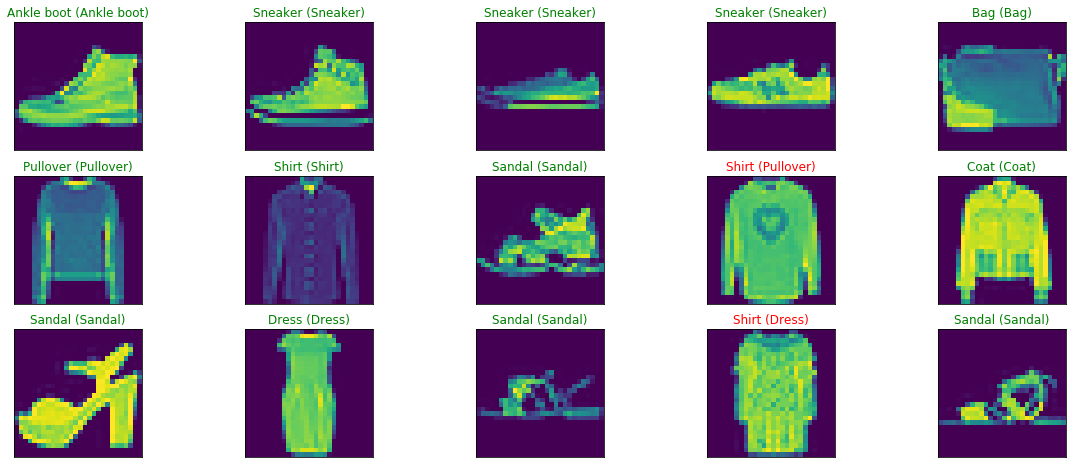

In [180]:
y_hat = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = y_test[index]
   # Set the title for each image
    ax.set_title("{} ({})".format(class_names[predict_index], 
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

### Plot Learning Curve

In [177]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

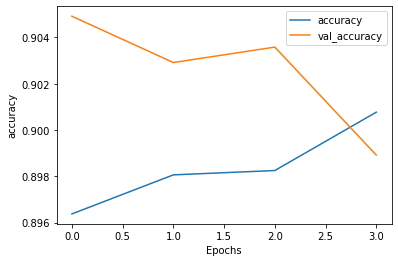

In [178]:
plot_graphs(history, 'accuracy')

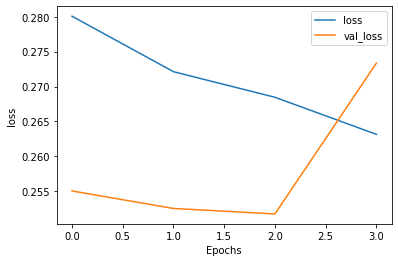

In [179]:
plot_graphs(history, 'loss')